# How to handle class imbalance 


- This tutorial illustrates how to handle class imbalance. 

We will use `upsampling`, `downsampling`, and `SMOTE`.

Note: There are other variations of `SMOTE` which can be found here: https://imbalanced-learn.org/stable/references/over_sampling.html

Other variations of `SMOTE` will not be addressed here.

In [1]:
import pandas as pd
import numpy as np

# Read data

Diabetic Data from Prima Indian Population: original source is https://www.kaggle.com/uciml/pima-indians-diabetes-database

Class label is the last column. Two classes : `0: nondiabetic, 1: diabetic`



In [101]:
df = pd.read_csv('pimaDiabetes.csv')
df_features = df_train.loc[:,'Pregnancies':'Age']
df_class = df_train.loc[:,'Outcome']
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,131,66,40,0,34.3,0.196,22,1
1,3,193,70,31,0,34.9,0.241,25,1
2,4,95,64,0,0,32.0,0.161,31,1
3,5,136,84,41,88,35.0,0.286,35,1
4,5,168,64,0,0,32.9,0.135,41,1
...,...,...,...,...,...,...,...,...,...
613,9,89,62,0,0,22.5,0.142,33,0
614,10,101,76,48,180,32.9,0.171,63,0
615,2,122,70,27,0,36.8,0.340,27,0
616,5,121,72,23,112,26.2,0.245,30,0


# Train and Test split and Scaling

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_class,test_size=0.2)

In [115]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Note here, the scaling is usually performed before any sampling method to balance the training data set.

## Check for class imbalance

In [116]:
print("No. of samples in each class in training set ")
y_train.value_counts()

No. of samples in each class in training set 


0    402
1     92
Name: Outcome, dtype: int64

In [117]:
print("No. of samples in each class in testing set ")
y_test.value_counts()

No. of samples in each class in testing set 


0    98
1    26
Name: Outcome, dtype: int64

Clearly, the class `0` is the majority class

## Balance the training set

`X_train_std` is a numpy matrix containing the scaled features

In [124]:
print(X_train_std.shape)
X_train_std

(494, 8)


array([[-0.46690199,  2.64280526,  0.05293548, ...,  0.44432548,
         0.37782507,  2.53915384],
       [ 2.65843111,  0.17350357,  0.49059447, ..., -0.59926103,
        -0.60622465,  2.53915384],
       [ 0.78323125,  1.24570035,  0.27176497, ..., -0.24291442,
         1.19994255,  0.57657793],
       ...,
       [-0.7794353 , -0.44382186,  0.27176497, ...,  1.05520539,
        -0.50034589,  0.83256609],
       [-1.09196861,  0.8233198 ,  0.81883871, ...,  0.15161219,
        -0.06437449, -0.87402166],
       [ 1.72083118,  0.95328305,  1.0376682 , ..., -0.11564777,
         0.98818502,  1.77118936]])

Creating a data frame that contains the features and class labels from training set.
This will be used in upsampling and downsampling.

In [127]:
df_train = pd.DataFrame(X_train_std,columns=X_train.columns)
df_train['Outcome'] = y_train.tolist()
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.466902,2.642805,0.052935,4.946404,-0.690341,0.444325,0.377825,2.539154,1
1,2.658431,0.173504,0.490594,-0.210699,-0.690341,-0.599261,-0.606225,2.539154,0
2,0.783231,1.245700,0.271765,0.732673,1.070170,-0.242914,1.199943,0.576578,0
3,2.345898,0.725847,0.381180,-1.279855,-0.690341,0.253426,-0.104858,0.235260,0
4,1.095765,1.700572,1.037668,1.361588,2.237763,0.889759,1.038010,0.661907,1
...,...,...,...,...,...,...,...,...,...
489,-0.779435,-0.801221,-0.275309,0.229541,-0.690341,-0.255641,-0.814868,-0.959351,0
490,-1.091969,-0.476313,-0.275309,-0.210699,-0.690341,-1.299228,-0.628023,-0.959351,0
491,-0.779435,-0.443822,0.271765,-1.279855,-0.690341,1.055205,-0.500346,0.832566,1
492,-1.091969,0.823320,0.818839,0.355324,-0.690341,0.151612,-0.064374,-0.874022,0


#### Create balanced training set by downsampling majority class

In [8]:
from sklearn.utils import resample

In [128]:
# Separate majority and minority classes
df_train_majority = df_train.loc[df_train['Outcome']==0,:] # rows with outcome  = 0
df_train_minority = df_train.loc[df_train['Outcome']==1,:] # rows with outcome = 1
print("Shape of unbalanced training set")
print('majority class',df_train_majority.shape) 
print('minority class',df_train_minority.shape) 

# Downsample majority class
df_train_majority_downsampled = resample(df_train_majority, 
                                 replace=False,    
                                 n_samples=92) # randomly select 92 samples from majority class with no replacement

#combine downsampled majority data and minority data
df_train_downsampled = pd.concat([df_train_majority_downsampled, df_train_minority])

print('\n==========================================================\n')

print('Class distribution in downsampled balanced training set')
print(df_train_downsampled['Outcome'].value_counts())

#separate the features and class labels in two data frames
X_train_down = df_train_downsampled.loc[:,'Pregnancies':'Age']
y_train_down = df_train_downsampled.loc[:,'Outcome']
print(X_train_down.shape)

Shape of unbalanced training set
majority class (402, 9)
minority class (92, 9)


Class distribution in downsampled balanced training set
0    92
1    92
Name: Outcome, dtype: int64
(184, 8)


#### Create balanced training set by upsampling minority class

In [129]:
# upsample minority class
df_train_minority_upsampled = resample(df_train_minority, 
                                 replace=True,    
                                 n_samples=402) #randomly select 402 samples from minority class with  replacement

df_train_upsampled = pd.concat([df_train_majority, df_train_minority_upsampled])

print('\n==========================================================\n')
print('Class distribution in downsampled balanced training set')
print(df_train_upsampled['Outcome'].value_counts())

#separate the features and class labels in two data frames
X_train_up = df_train_upsampled.loc[:,'Pregnancies':'Age']
y_train_up = df_train_upsampled.loc[:,'Outcome']
print(X_train_up.shape)



Class distribution in downsampled balanced training set
0    402
1    402
Name: Outcome, dtype: int64
(804, 8)


#### SMOTE

You will need to install a package called `imblearn` to use SMOTE.

`pip install imbalanced-learn`

or

`conda install -c conda-forge imbalanced-learn`

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [130]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train_std, y_train) # note X_train_std is the scaled feature data
print("Size of New training data after SMOTE")
print(X_train_smote.shape)
print(y_train_smote.shape)
print("Class distribution after SMOTE")
print(y_train_smote.value_counts())

Size of New training data after SMOTE
(804, 8)
(804,)
Class distribution after SMOTE
1    402
0    402
Name: Outcome, dtype: int64


# Train using the balanced training data

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

'''
K-nearest neighbors model
'''
knn = KNeighborsClassifier()
param_grid1 = {
    'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15]
}


'''
Maximize balanced_accuracy which is the average of recall obtained on each class.
Note: Recall is sensitivity or accuracy on one of the classes.
Therefore, balanced_accuracy is the averaged accuracies for the two classes.
'''

'''
model on unbalanced set
'''
grid_search = GridSearchCV(estimator =knn, param_grid = param_grid1, scoring='balanced_accuracy', cv = 5, verbose = 1)
grid_search.fit(X_train_std, y_train)

'''
model on upsampled train set
'''
grid_search_up = GridSearchCV(estimator = knn, param_grid = param_grid1, scoring='balanced_accuracy', cv = 5, verbose = 1)
grid_search_up.fit(X_train_up, y_train_up)

'''
model on downsampled train set
'''
grid_search_down = GridSearchCV(estimator = knn, param_grid = param_grid1, scoring='balanced_accuracy', cv = 5, verbose = 1)
grid_search_down.fit(X_train_down, y_train_down)

'''
model on SMOTE train set
'''
grid_search_smote = GridSearchCV(estimator = knn, param_grid = param_grid1, scoring='balanced_accuracy', cv = 5, verbose = 1)
grid_search_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]},
             scoring='balanced_accuracy', verbose=1)

# Compute different metrics on unbalanced testing data

In [134]:
from sklearn.metrics import classification_report
from sklearn import metrics
print("\n=======================================================================")
print("Prediction results on test set - model trained on unbalanced train set")
y_pred = grid_search.predict(X_test_std)
print(classification_report(y_test,y_pred))


print("\n======================================================================")
print("Prediction results on test set - model trained on upsampled train set")
y_pred = grid_search_up.predict(X_test_std)
print(classification_report(y_test,y_pred))

print("\n======================================================================")
print("Prediction results on test set - model trained on downsampled train set")
y_pred = grid_search_down.predict(X_test_std)
print(classification_report(y_test,y_pred))

print("\n=====================================================================")
print("Prediction results on test set - model trained on SMOTE train set")

y_pred = grid_search_smote.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - model trained on unbalanced train set
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        98
           1       0.50      0.42      0.46        26

    accuracy                           0.79       124
   macro avg       0.68      0.66      0.66       124
weighted avg       0.78      0.79      0.78       124


Prediction results on test set - model trained on upsampled train set
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        98
           1       0.41      0.62      0.49        26

    accuracy                           0.73       124
   macro avg       0.65      0.69      0.66       124
weighted avg       0.78      0.73      0.75       124


Prediction results on test set - model trained on downsampled train set
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        98
           1       0.

C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Display `AUC` and `AUPRC` values

In [142]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

def auc_auprc(model,data,y_real_class):
    y_pred_prob = model.predict_proba(data) # give the probabilities
    print(y_pred_prob.shape)
    y_pred_prob_minority_class = y_pred_prob[:,1]
    print('AUC score: ',roc_auc_score(y_real_class, y_pred_prob_minority_class))
    precision, recall, _ = precision_recall_curve(y_real_class, y_pred_prob_minority_class)
    print('AUPRC score: ',auc(recall, precision))

print("\n======================================================================")

print("AUC & AUPRC on test set - model trained on unbalanced train set")
auc_auprc(grid_search,X_test_std,y_test)
print("AUC & AUPRC results on test set - model trained on upsampled train set")
auc_auprc(grid_search_up,X_test_std,y_test)
print("AUC & AUPRC results on test set - model trained on downsampled train set")
auc_auprc(grid_search_down,X_test_std,y_test)
print("AUC & AUPRC results on test set - model trained on SMOTE train set")
auc_auprc(grid_search_smote,X_test_std,y_test)


AUC & AUPRC on test set - model trained on unbalanced train set
(124, 2)
AUC score:  0.7309654631083202
AUPRC score:  0.32053349875930526
AUC & AUPRC results on test set - model trained on upsampled train set
(124, 2)
AUC score:  0.7352825745682888
AUPRC score:  0.5411449386015142
AUC & AUPRC results on test set - model trained on downsampled train set
(124, 2)
AUC score:  0.7935635792778649
AUPRC score:  0.450868587241538
AUC & AUPRC results on test set - model trained on SMOTE train set
(124, 2)
AUC score:  0.75
AUPRC score:  0.5240406741199972


C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Note that AUC is overestimated when prediction is performed on an unbalanced `test set`. Its important to look at other metrics and not just `AUC` when it comes to unbalanced set.

# Draw Precision Recall Curve

C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


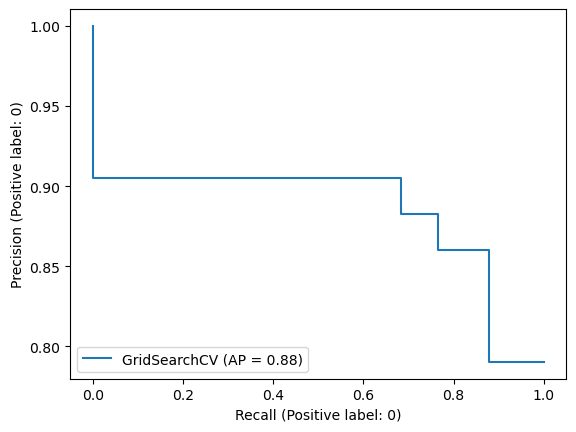

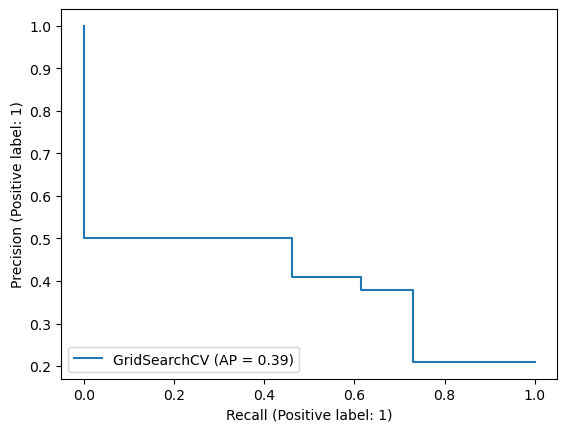

In [137]:
from sklearn.metrics import PrecisionRecallDisplay
display1 = PrecisionRecallDisplay.from_estimator(
    grid_search_up, X_test_std, y_test, pos_label = 0
)

from sklearn.metrics import PrecisionRecallDisplay
display1 = PrecisionRecallDisplay.from_estimator(
    grid_search_up, X_test_std, y_test, pos_label = 1
)

# Draw ROC Curve

C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\soibamb\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


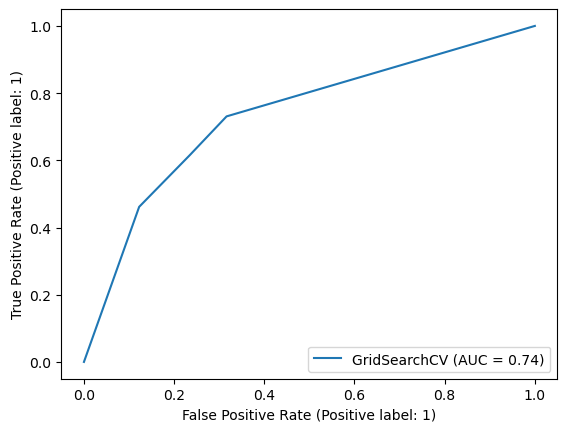

In [136]:
from sklearn import metrics
metrics.plot_roc_curve(grid_search_up, X_test_std, y_test) 